In [20]:
import json

import numpy as np

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# README

In this notebook, we will produce nice plots of the correlations between reddit and twitter results for each model and task.

In [2]:
metric_names_pretty = {
    'test_acc_gt'   : 'Treatment Accuracy',
    'bias_ipw_gt'   : 'Bias of ATE (IPTW)',
    'bias_strat_gt' : 'Bias of ATE (Stratified)',
}

In [3]:
run_to_use = '4_no_bootstrap'

# Overall correlations

In [4]:
with open(f'results_correlations/{run_to_use}/by_metric.json') as f:
    results_by_metric = json.load(f)

In [5]:
print(f'{"METRIC":<30} {"PEARSON":>10}  {"SPEARMAN":>10}')
for metric_name, metric_name_pretty in metric_names_pretty.items():
    print(f'{metric_name_pretty:<30} {results_by_metric[metric_name]["pearson"]:10.3f}  {results_by_metric[metric_name]["spearman"]:10.3f}')

METRIC                            PEARSON    SPEARMAN
Treatment Accuracy                  0.918       0.911
Bias of ATE (IPTW)                  0.740       0.775
Bias of ATE (Stratified)            0.878       0.872


# Correlations for Each Task

In [6]:
task_names_pretty = {
    'Linguistic Complexity'        : 'Linguistic Complexity',
    'Signal Intensity'             : 'Signal Intensity',
    'Strength of Selection Effect' : 'Strength of Selection Effect',
    'Number of Users'              : 'Sample Size',
    'Absence of Treatment Effect'  : 'Placebo Test',
}

In [7]:
with open(f'results_correlations/{run_to_use}/by_experiment.json') as f:
    results_by_task = json.load(f)

In [8]:
def plot_correlations_for_each_task(correlation_coefficient_type = 'pearson'):
    tasks_df = {metric_name_pretty : [results_by_task[task_name][metric_name][correlation_coefficient_type] for task_name in task_names_pretty] for metric_name, metric_name_pretty in metric_names_pretty.items()}
    tasks_df = pd.DataFrame(data=tasks_df, index=task_names_pretty.values())
    
    sns.heatmap(tasks_df, annot=True, cbar=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title(f'Reddit vs. Twitter Results, {correlation_coefficient_type.capitalize()} Correlation')
    plt.show()

In [9]:
# plot_correlations_for_each_task(correlation_coefficient_type = 'pearson')

In [10]:
# plot_correlations_for_each_task(correlation_coefficient_type = 'spearman')

# Correlations for each Model

In [11]:
model_names_pretty = {
    'Logistic_Regression_(1gram)' : 'Logistic Regression (1-grams)',
    'Simple_NN_(1gram)'           : 'Simple NN (1-grams)',
    'Logistic_Regression'         : 'Logistic Regression (1,2-grams)',
    'Simple_NN'                   : 'Simple NN (1,2-grams)',
    'Logistic_Regression_counts'  : 'Logistic Regression (1,2-grams, counted)',
    'Simple_NN_counts'            : 'Simple NN (1,2-grams, counted)',
    'Logistic_Regression_LDA'     : 'Logistic Regression (LDA features)',
    'Simple_NN_LDA'               : 'Simple NN (LDA features)',
    'HBERT'                       : 'SHERBERT',
#     'oracle'                      : 'Oracle Propensity',
}

In [12]:
with open(f'results_correlations/{run_to_use}/by_model.json') as f:
    results_by_model = json.load(f)

In [13]:
def plot_correlations_for_each_model(correlation_coefficient_type = 'pearson'):
    models_df = {metric_name_pretty : [results_by_model[model_name][metric_name][correlation_coefficient_type] for model_name in model_names_pretty] for metric_name, metric_name_pretty in metric_names_pretty.items()}
    models_df = pd.DataFrame(data=models_df, index=model_names_pretty.values())
    
    sns.heatmap(models_df, annot=True, cbar=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title(f'Reddit vs. Twitter Results, {correlation_coefficient_type.capitalize()} Correlation')
    plt.show()

In [14]:
# plot_correlations_for_each_model(correlation_coefficient_type = 'pearson')

In [15]:
# plot_correlations_for_each_model(correlation_coefficient_type = 'spearman')

# joint plot for both

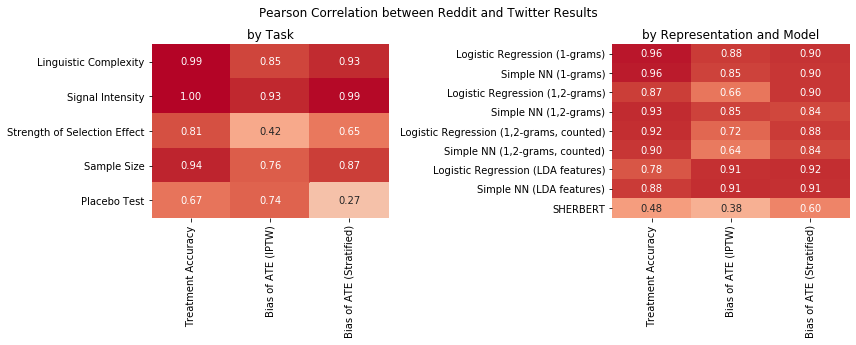

In [16]:
correlation_coefficient_type = 'pearson'


tasks_df = {metric_name_pretty : [results_by_task[task_name][metric_name][correlation_coefficient_type] for task_name in task_names_pretty] for metric_name, metric_name_pretty in metric_names_pretty.items()}
tasks_df = pd.DataFrame(data=tasks_df, index=task_names_pretty.values())
tasks_df.index.name = 'Task'

models_df = {metric_name_pretty : [results_by_model[model_name][metric_name][correlation_coefficient_type] for model_name in model_names_pretty] for metric_name, metric_name_pretty in metric_names_pretty.items()}
models_df = pd.DataFrame(data=models_df, index=model_names_pretty.values())
models_df.index.name = 'Representation and Model'


fig, axs = plt.subplots(ncols=2, figsize=(12,5))

for ax, data in zip(axs, (tasks_df, models_df)):
    sns.heatmap(data, annot=True, cbar=False, cmap='coolwarm', center=0, vmin=-1, vmax=1, ax=ax, fmt='.2f')
    ax.set_title(f'by {data.index.name}')
    ax.yaxis.label.set_visible(False)
    
fig.suptitle(f'{correlation_coefficient_type.capitalize()} Correlation between Reddit and Twitter Results')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('figs/twitter_comparison.pdf')
plt.show()

# correlation playground ignore me

In [18]:
pd.Series([0, 0, 0, 1, 1, 1]).corr( pd.Series([1, 1, 1, 0, 0, 0]) )

-0.9999999999999998

In [19]:
pd.Series([0, 0, 0, 1, 1, 1]).corr( pd.Series([0, 0, 0, 1, 1, 1]) )

0.9999999999999998

In [31]:
pd.Series([1, 2, 3, 1, 2, 3, 4]).corr( pd.Series([1, 2, 3, 1, 2, 3, 4]) )

0.9999999999999998

In [32]:
pd.Series([1, 2, 3, 4, 1, 2, 3,]).corr( pd.Series([1, 2, 3, 4, 1, 2, 3,]) )

0.9999999999999998

In [23]:
np.random.normal(size=10)

array([-0.68785577,  0.2950769 , -0.89259679,  0.81845058,  0.80651674,
       -0.21670334, -0.12298488, -0.79161913,  0.34867488,  0.15567901])

2 0.272
3 0.514
4 0.690
5 0.735
6 0.812
7 0.838
8 0.864
9 0.891
10 0.909
11 0.924
12 0.936
13 0.944
14 0.949
15 0.955
16 0.961
17 0.964
18 0.968
19 0.971


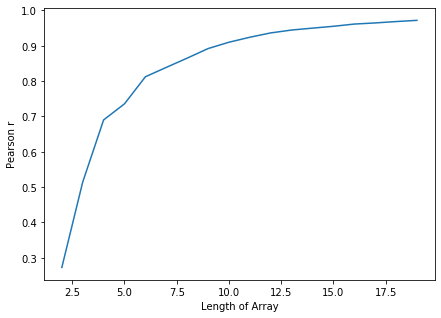

In [30]:
sizes    = []
cc_means = []

for size in range(2, 20):
    ccs = []
    for _ in range(500):
        a = np.arange(size) + np.random.normal(size=size)
        b = np.arange(size) + np.random.normal(size=size)

        ccs.append( pd.Series(a).corr( pd.Series(b) ) )

    print( f'{size} {np.array(ccs).mean():.3f}' )
    
    sizes.append(size)
    cc_means.append( np.array(ccs).mean() )
    
    
plt.figure(figsize=(7, 5))

plt.plot(sizes, cc_means)
plt.xlabel('Length of Array')
plt.ylabel("Pearson r")
plt.show()
